# Cut-edges possibilities
This notebook summarizes the possible ways in which we create cut-edges. 

In [29]:
import spot
import buddy
spot.setup()

seminator_path = '../seminator'
def seminator(filename, opt = ''):
    return spot.automaton(f'{seminator_path} {opt} -s0 {filename} |')

## Cut-on-SCC-entry
Everytime we have an edge that freshly enters an accepting SCC, we create a cut-edge.

We first create an example automaton using HOA.

In [33]:
# %load cut-on-scc-entry.hoa
HOA: v1
States: 3
Start: 0
AP: 1 "a"
Acceptance: 1 Inf(0)
properties: trans-labels explicit-labels trans-acc
--BODY--
State: 0
[0] 0
[!0] 1
[0] 2
State: 1
[!0] 1
[0] 0 {0}
State: 2
[0] 2 {0}
--END--


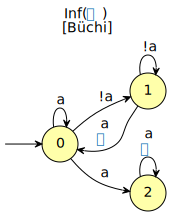

In [34]:
a = spot.automaton('cut-on-scc-entry.hoa'); a

### The default output of Seminator
Cannot be further simplified

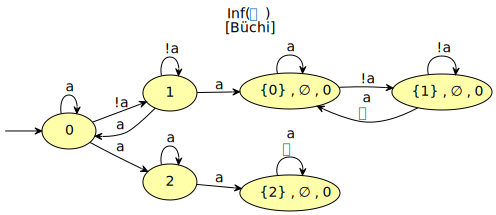

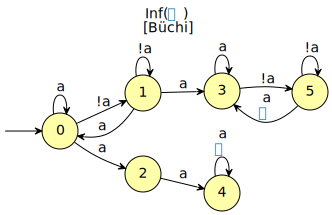

In [35]:
sem = seminator('cut-on-scc-entry.hoa')
display(sem)
display(sem.postprocess())

In the next we add a transition to the result of Seminator and it will reduce the states after simplifications. For the transition $t=$ 0->2 of the input automaton we add additional cut transition as if $t$ would be accepting.

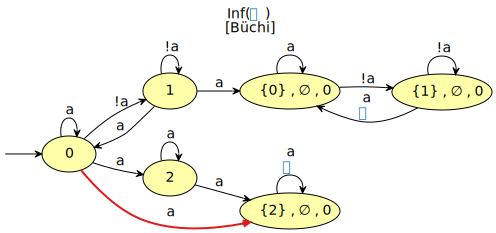

In [36]:
sem1 = seminator('cut-on-scc-entry.hoa')
a = buddy.bdd_ithvar(sem1.register_ap('a'))
sem1.new_edge(0,4,a)
sem1.highlight_edge(14,5)

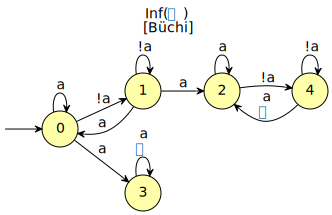

In [37]:
sem1.postprocess()

### Test implementation

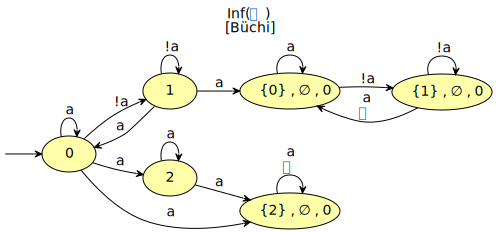

In [39]:
sem2 = seminator('cut-on-scc-entry.hoa','--cut-on-SCC-entry'); sem2

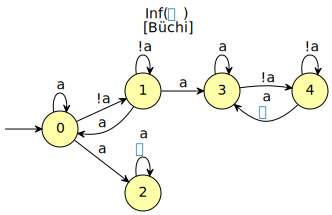

In [40]:
sem2.postprocess()

### Prepare test

In [50]:
%%file ../tests/cut-on-scc-entry.test
set -e

../seminator -s0 --cut-on-SCC-entry cut-on-scc-entry.hoa > cut-on-scc-entry.out
cat cut-on-scc-entry.out
diff cut-on-scc-entry.out cut-on-scc-entry.expected

Overwriting ../tests/cut-on-scc-entry.test


In [51]:
%cp cut-on-scc-entry.hoa ../tests/
print(sem2.to_str(), file=open('../tests/cut-on-scc-entry.expected','w'))